# Дерево решений

Рассмотрим бинарное дерево, в котором 
- каждой внутренней вершине $v$ приписана функция (или предикат) $\beta_v : X \rightarrow \{0, 1\}$;
- каждой листовой вершине $v$ приписан прогноз $c_v \in Y$

**Предикаты**
- одномерные $\beta_v(x; j, t) = [x_j < t]$ сравнивают значение одного из признаков с порогом
- многомерные линейные $\beta_v(x) = [\langle w,x\rangle < t]$;
- многомерные метрические $\beta_v(x) = [\rho (x, x_v) < t]$, где $x_v$ - один из объектов выборки любой точки признакового пространства

## Построение деверьев

Начнем со всей обучающей выборки $X$ и найдем наилучшее ее разбиение на 2 части $R_1(j,t) = \{x|x_j < t\}$ и $R_2(j,t) = \{x|x_j \ge t\}$ с точки зрения заданного функционала качества $Q(X,j,t)$. Найдя наилучшее значение $j$ и $t$, создадим корневую вершины дерева, поставив ей  сообтветствие предикат $[x_j < t]$. Для каждой из двух подвыборок рекурсивно повторим процедуру пока не выполнится некоторое условие останова. В основе такого алгоритма лежит принцип жадной максимизации прироста информации. 

## Функционал качества 

Прирост информативности (information gain):

$$ Q(R_m, j) = H(R_m) - \frac{|R_l|}{|R_m|} H(R_l)- \frac{|R_r|}{|R_m|} H(R_r) \rightarrow max$$

$$H(R) = \min_{c \in Y} \frac{1}{|R|} \sum_{(x_i, y_i) \in R} L(y_i, c)$$

## Критерии инфомативности

#### Ошибка классификации 
$$p_k = \frac{1}{|R|}\sum_{((x_i,y_i)\in R} [y_i = k]$$

$$k_* = argmax_k p_k$$

$$H(R) = \min_{c\in Y} \frac{1}{|R|}\sum_{(x_i,y_i)\in R}[y_i \neq c]$$

тогда очевидно, что 
$$H(R) = \min_{c\in Y} \frac{1}{|R|}\sum_{(x_i,y_i)\in R}[y_i \neq k_*] = 1 - p_{k_*}$$


#### Критерий Джини 

$$ H(R) = \sum_{k=1}^K p_k(1-p_k)$$

#### Энтропийный критерий

$$ H(R) = -\sum_{k=1}^K p_k\log{p_k}$$



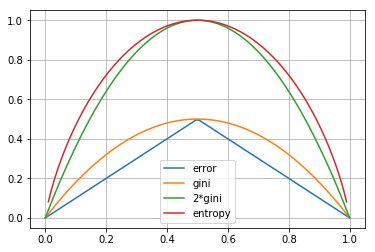

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


x = np.linspace(0., 1., 100)
plt.plot(x, 1 - np.max((x, 1-x), axis=0), label='error')
plt.plot(x, 2 * x * (1-x), label='gini')
plt.plot(x, 4 * x * (1-x), label='2*gini')
plt.plot(x, - x * np.log2(x) - (1 - x) * np.log2(1 - x), label = 'entropy')
plt.grid(True)
plt.legend();

## Пример построения

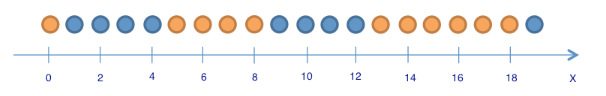
Здесь 9 синих шариков и 11 желтых.

$p_1 = \frac{9}{20}$, $p_2 = \frac{11}{20}$

$H_0 = -\frac{9}{20}\log_2 \frac{9}{20} -\frac{11}
{20}\log_2 \frac{11}{20} \approx 1$. 

Разобъем шарики на две группы:
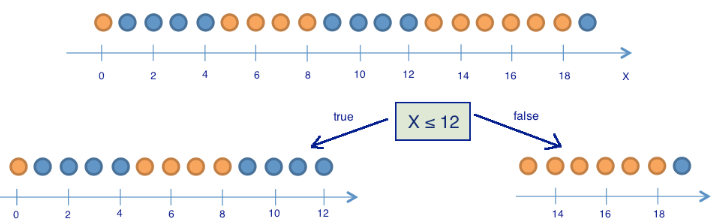

$H_l = -\frac{5}{13}\log_2 \frac{5}{13} -\frac{8}{13}\log_2 \frac{8}{13} \approx 0.96$

$H_r = -\frac{1}{7}\log_2 \frac{1}{7} -\frac{6}{7}\log_2 \frac{6}{7} \approx 0.6$

$Q([x\le12]) = H_0 - \frac{13}{20}H_l - \frac{7}{20}H_r \approx 0.16$

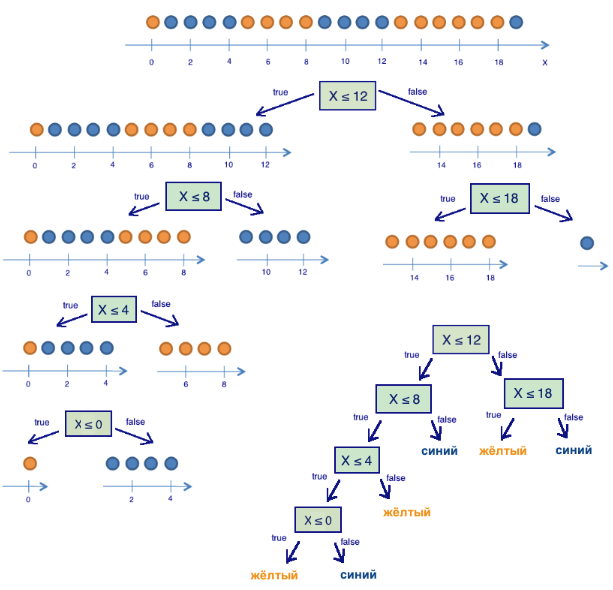

## Количественные признаки

![](./images/зарплата1.png)

Отсортируем по возрастанию вораста:
![](./images/зарплата2.png)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
X = np.array([17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33]).reshape(-1, 1)
y = np.array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])
clf = DecisionTreeClassifier()
clf.fit(X, y);

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(clf, feature_names=['Возраст'], out_file='./images/age_tree.dot', filled=True)

import pydot
(graph,) = pydot.graph_from_dot_file('./images/age_tree.dot')
graph.write_png('./images/age_tree.png')

![](./images/age_tree.png)

Дерево использует только 5 значений для сравнения: 43. 5, 19, 22.5, 30 и 32, которые являются средними между значениями на стыках разных классов. 

## Категориальные признаки

Обозначим через $R_m(u)$ множество объектов, которые попали в вершину $m$ и у которых $j$-й признак имеет значение $u$, через $N_m(u)$ обозначим количество таких объектов. 
В случае с бинарной классификацией упорядочим все зачения категориального признака на основе того, какая доля объектов с таким значением имеет класс +1:
$$\frac{1}{N_m(u_{(1)})} \sum_{x_i \in R_m(u_{(1)})}[y_i = +1] \leq \dots \leq \frac{1}{N_m(u_{(q)})} \sum_{x_i\in R_m(u_{(q)})}[y_i = +1],$$
после чего заменим категорию $u_{(i)}$ на число $i$,
и будем искать разбиение как для вещественного признака.

## Критерии останова

Основные критерии останова:
- ограницение максимальной глубины дерева;
- ограничение минимального числа объектов в листе;
- ограничение максимального количества листьев в дереве;
- останов в случае, если все объекты в листе относятся к одному классу;
- требование, что функционал качества при дроблении улучшался как минимум на $s$ процентов

## Методы стрижки дерева 

Стрижка дерева (pruning) - метод, при котором сначала дерево строится до тех пор, пока в каждом листе не окажется по одному объекту, а затем производится оптимизация его структуры с целью улучшения обобающей способности. Используется редко.

**Cost-complexity  pruning**

Стрижка производится за счет добавления к функционалу качетсва штрафа за размер дерева: 

$H_\alpha(T) = H(T) + \alpha|T|$

Существует последовательность вложенных деревьев с одинаковыми корнями: $T_K \subset T_{K-1} \subset \dots \subset T_0$, в которой кадое дерево $T_i$ минимизирует критери качетсва $H_\alpha$ для $\alpha$ из интервала $[\alpha_i, \alpha_{i+1})$

$0 = \alpha_0 < \alpha_1 < \dots < \alpha_K < \infty$

Эту последовательность можно достаточно эффективно найти путем обхода дерева.
Далее из нее выбирается оптимальное дерево по отложенной выборке или с помощью кросс-валидации.

## Обработка пропущенных значений

Одним из основных преимуществ решающих деревьев является возможность работы с пропущенными значениями.
- **Пустить в оба поддерева**

Если на некотором этапе построения дерева в выборке $R$ оказались объекты, для которых признак $j$ неизвестен, они игнорируются при вычислении функцинала в данной вершине:
$$Q(R, j, s) \approx \frac{|R \setminus V_{j}|}{|R|} Q(R \setminus V_{j}, j, s)$$
Если данный предикат окажется лучшим, поместим объекты $V_j$ как в левое, так и в правое поддерево с весам $|R_l| / |R|$ и $|R_r| / |R|$ соответсвенно. В дальнейшем веса можно учитывать, добавляя их как коэффициенты перед индикаторами $[y_i = k]$ во всех формулах.
На этапе применения дерева делаем схожую процедуру:
$$a_{mk}(x) = \begin{cases} 
              a_{\ell k}(x), \quad &\beta_m(x) = 0;\\
              a_{r k}(x), \quad &\beta_m(x) = 1;\\
              \frac{|R_\ell|}{|R_m|} a_{\ell k}(x) +
              \frac{|R_r|}{|R_m|} a_{r k}(x), \quad &\beta_m(x)\ \text{нельзя вычислить},
              \end{cases}$$
              
где $a_{mk}$ - это прогноз вероятности для класса $k$ в поддереве $R_m$.
              
- **Суррогатные предикаты**

Для каждой вершины строится запасной предикат, которой использует другой признак, но при этом дает разбиение, максимально близкое в данному.    

- **Замена пропусков нулями**
- **Замена пропусков на числа, превосходяшие любое значение данного признака**

## Методы построения деревьев

Существует несколько популярных методов построения деревьев:
- ID3:
    - Энтропийный критерий
    - Критерии останова: в каждом листе объекты одного класса или пока разбиение вершины дает уменьшение энтропийнго критерия
- C4.5: 
    - Нормированный энтропийний критерий (Gain Ratio)
    - Критерий останова - ограничение на число объектов в листе
    - Стрижка методом Error-Based Pruning
    - Обработка пропущенных зачений с помощью метода взвешенного пропуска объектов в оба поддерева
- CART: 
    - Критерий Джини
    - Cost-Complexity Pruning
    - Суррогатные предикаты

## Дерево решений в задаче регрессии

В качетсве функционала качетсва выберем квадрат отклонения:
$$H(R) = \min_{c\in Y}\frac{1}{|R|}\sum_{(x_i, y_i)\in R} (y_i - c)^2$$

Минимум в этом выражении будет достигаться на среднем значении целовой переменной. Отсюда 
$$H(R) = \min_{c\in Y}\frac{1}{|R|}\sum_{(x_i, y_i)\in R} \left(y_i - \frac{1}{|R|}\sum_{(x_i, y_i)\in R} y_i\right)^2$$

Таким образом, критерием информативности выступает дисперсия - чем ниже разброс целевой переменной, тем лучше вершина. 

Попробуем с помощью ДР восстановить функцию $f(x) = e^{-x^2} + 1.5e^{-(x-2)^2}$

In [111]:
n_train = 100
n_test = 500
f = lambda x: np.exp(- x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)
X_train = np.random.uniform(-5, 5, size=n_train)
y_train = f(X_train) + np.random.normal(0.0, 0.1, n_train)

X_test = np.linspace(-5, 5, n_test)
y_test = f(X_test)

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train.reshape(-1, 1), y_train)
y_pred = tree.predict(X_test.reshape(-1, 1))


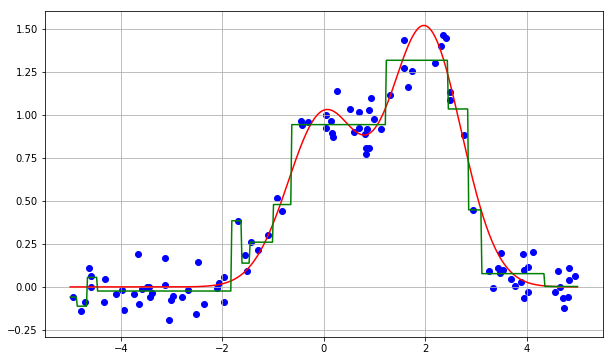

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='b')
plt.plot(X_test, y_test, color = 'r')
plt.plot(X_test, y_pred, color = 'g')
plt.grid(True);

## Пример

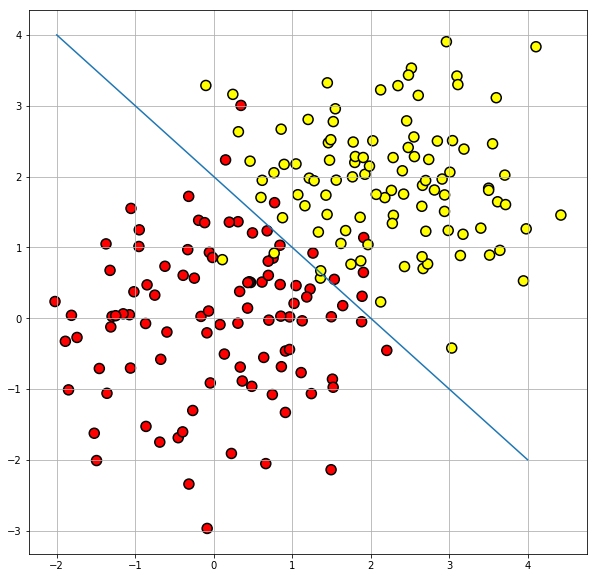

In [113]:
n = 100
np.seed = 17
X0 = np.random.normal(size=(n, 2))
X1 = np.random.normal(loc=2, size=(n, 2))
X = np.vstack((X0, X1))
x_min = np.min(X, axis=0) - 1
x_max = np.max(X, axis=0) + 1
x1, x2 = np.meshgrid(np.arange(x_min[0], x_max[0], 0.01), np.arange(x_min[1], x_max[1], 0.01))

y = np.hstack((np.zeros(n), np.ones(n)))
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y,  s=100, cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot([-2, 4], [4, -2])
plt.grid(True);

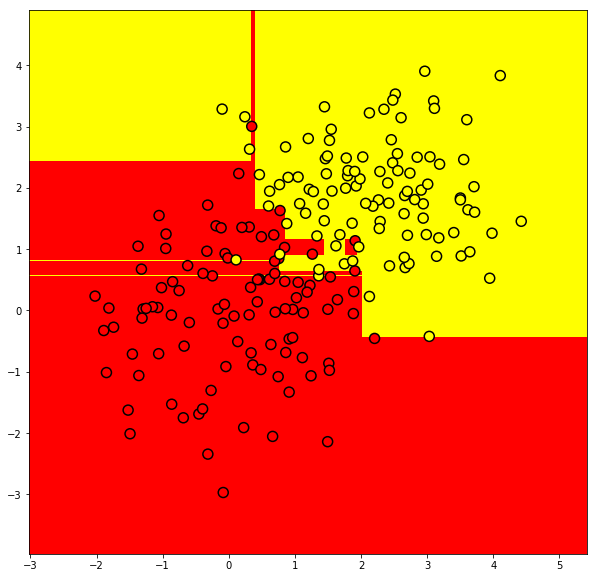

In [114]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=17)
clf.fit(X, y)
predicted = clf.predict(np.vstack((x1.flatten(), x2.flatten())).T).reshape(x1.shape)

plt.figure(figsize=(10,10))
plt.pcolormesh(x1, x2, predicted, cmap='autumn')
plt.scatter(X[:,0], X[:,1], c=y,  s=100, cmap='autumn', edgecolors='black', linewidth=1.5)



### Пример XOR

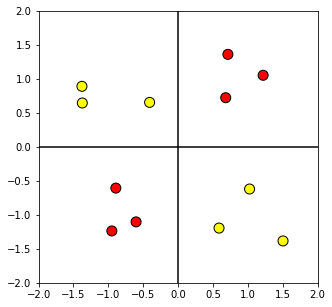

In [10]:
M = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
labels = np.array([0, 1, 1, 0])
X = []
Y = []
for m, label in zip(M, labels):
    X.extend(np.c_[np.random.normal(m[0], 0.35, 3), np.random.normal(m[1], 0.35, 3)])
    Y.extend([label] * 3)
X = np.array(X)

x_min = np.min(X, axis=0) - 0.5
x_max = np.max(X, axis=0) + 0.5

plt.figure(figsize=(5, 5))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.scatter(X[:, 0], X[:, 1], c= Y,cmap ='autumn', s=100, edgecolor='black')
plt.plot([-2, 2], [0, 0], c='black')
plt.plot([0, 0], [-2, 2], c='black')

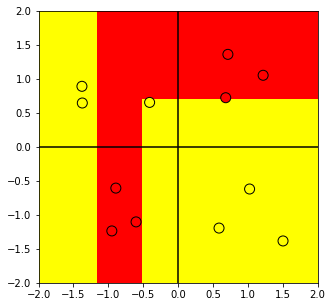

In [11]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X, Y)



x1, x2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

predicted = clf.predict(np.vstack((x1.flatten(), x2.flatten())).T).reshape(x1.shape)

plt.figure(figsize=(5, 5))
plt.pcolormesh(x1, x2, predicted, cmap='autumn')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.scatter(X[:, 0], X[:, 1], c= Y,cmap ='autumn', s=100, edgecolor='black')
plt.plot([-2, 2], [0, 0], c='black')
plt.plot([0, 0], [-2, 2], c='black')

In [12]:
export_graphviz(clf, feature_names=['x1', 'x2'], out_file='./images/xor2.dot', filled=True)

import pydot
(graph,) = pydot.graph_from_dot_file('./images/xor2.dot')
graph.write_png('./images/xor2.png')

![](./images/xor2.png)

## Пример Титаник

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
data = pd.read_csv('./data/titanic.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
X = data[np.isnan(data['Age']) == False][['Pclass', 'Fare', 'Age', 'Sex','Survived']]
Y = X['Survived'].values
X = X[['Pclass', 'Fare', 'Age', 'Sex']].values
for i in range(np.shape(X)[0]):
    if X[i][3] == 'female':
        X[i][3] = 0
    else: X[i][3] = 1
        
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X_train, y_train)
clf.feature_importances_


array([0.14277148, 0.28765041, 0.29255061, 0.2770275 ])

In [123]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int or None, optional (default=None)
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int, float, optional (default=2)

In [68]:
params = {'max_depth': [2, 3, 4, 5, 7, 10, None]}
local_best_tree = GridSearchCV(clf, params, scoring='accuracy',cv=5)
local_best_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=241,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 7, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [69]:
y_pred = local_best_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7832167832167832

In [73]:
local_best_tree.best_params_

{'max_depth': 2}

## Пример MNIST

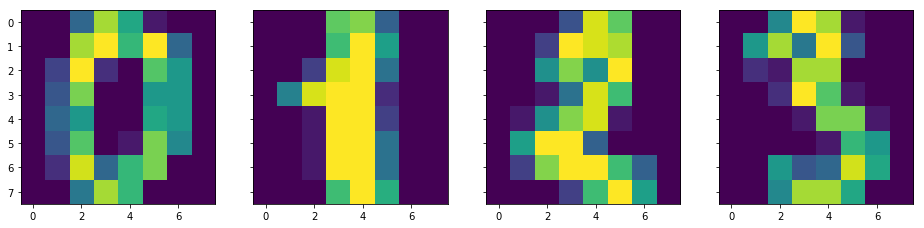

In [115]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier()

params = {'max_depth': [2, 3, 4, 5, 7, 10, None],
          'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}
local_best_tree = GridSearchCV(clf, params, scoring='accuracy',cv=5)
local_best_tree.fit(X_train, y_train);

In [121]:
y_pred = local_best_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8361111111111111

## Преимущества и недостатки

**Преимущества:**

- интерпретируемость
- возможность обхода пропусков в данных
- допускаются разнотипные данные
- малое число параметров

**Недостатки:**

- переобучение
- неустойчивость к шуму, составу выборки, критерию
- способность интерполировать, но не экстраполировать